### Predicting the energy prices in the United Kingdom.


# Import the required module and read the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('CE802_P3_Data.csv')
test_df = pd.read_csv('CE802_P3_Test.csv')

#### Print the first 5 rows of the data

In [3]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-190.11,193.53,2.32,-21.84,11289.72,UK,5730.72,638.55,Very high,467.97,...,174.81,23994.54,261.69,5,-177.15,17.60,-1437.20,4,178.20,1306.29
1,-257.94,1934.85,24.36,-22.06,2712.12,UK,3509.94,389.53,High,393.42,...,265.44,11554.06,205.14,4,-377.55,16.32,-1840.92,7,83.53,-118.07
2,-426.06,1071.87,0.10,-21.80,7469.01,USA,4633.20,-28.63,Medium,226.62,...,542.94,28254.56,363.93,5,-293.67,17.64,-1207.92,5,218.54,-708.14
3,-204.48,1533.96,7.42,-17.94,4261.77,Rest,3516.06,335.36,Very high,912.63,...,527.10,21449.30,23.31,4,-295.80,20.44,-139.58,6,154.74,2918.75
4,-232.08,1334.88,29.48,-19.88,2941.02,Rest,3592.04,-46.68,Very low,601.41,...,390.48,18060.98,248.79,3,-222.12,19.39,-2130.02,4,178.77,1113.09


#### Print the information about the data such as the data types, memory usages and null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   object 
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

#### **Observation**
- There are no missing values in the data

## Data Preprocessing
- Convert the catergorical data and object data to numeric data

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
data['F6'] = le.fit_transform(data['F6'])

In [8]:
data['F9'] = le.fit_transform(data['F9'])

In [9]:
test_df['F6'] = le.fit_transform(test_df['F6'])
test_df['F9'] = le.fit_transform(test_df['F9'])

# Building the models
- Linear Regression model is the first model created with the train data. The model performance is checked with the mean squared error and r2 score. The predicted values are also printed in comparison with the actual values
- Five other models are created, comparing their performance with the mean squared error and the r2 score

In [10]:
# Separate features and labels
X = data.drop(columns=['Target'])
y = data.Target.values

#### Split the data into training data(70% of the data) and test data (30%) of the data

In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Standardize X_train  and X_test

In [12]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [13]:
X_train_scaled

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,1.916969,0.158478,-0.076528,1.213397,0.571683,-1.345924,-0.073590,-0.527738,-1.382848,1.701750,...,0.713612,1.597182,-1.660815,0.262232,-1.082187,0.187044,-0.411255,0.630017,0.573851,-0.451554
1,-0.042625,-0.315618,-0.157668,0.719256,-1.125780,-0.441752,0.617734,0.577961,1.413475,-0.963468,...,0.471984,-0.125409,-0.962023,-1.944974,1.105101,0.653022,0.098540,0.526083,0.573851,-0.270081
2,0.934766,1.318233,-0.130811,0.463298,-0.573790,-0.441752,-2.352758,0.633452,0.714394,0.272765,...,1.668730,-1.278511,0.102448,-0.093347,-1.082187,0.392926,0.524150,-0.553238,0.573851,0.027818
3,-1.359446,1.407463,-0.160485,1.149407,0.114183,-0.441752,-2.356843,0.004738,-1.382848,-1.110253,...,-0.109293,-0.735390,-0.262781,2.519385,0.558279,0.533617,2.210217,0.858952,1.716113,-0.141164
4,-0.237238,0.038134,0.028051,1.184957,1.918839,-1.345924,0.131720,-1.647912,1.413475,-0.394317,...,-0.173119,1.646150,-1.206576,-3.214593,0.011457,-0.244344,-2.922817,0.852225,0.002720,0.448977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.116718,0.534815,-0.157038,-2.199377,-0.904018,-0.441752,0.145818,-0.529670,0.714394,-0.040346,...,0.025198,-0.542343,0.600356,-0.409206,0.011457,0.180059,1.714452,1.743243,-0.568411,0.049972
1046,0.546985,0.096856,-0.093853,-1.218204,1.739638,0.462419,0.161060,0.514638,0.015313,0.176167,...,-0.200474,-0.678418,-1.615111,-0.412298,0.011457,1.698729,-0.829849,0.068112,-1.139542,0.280702
1047,-0.395526,0.438236,-0.159226,0.857900,-0.473958,-0.441752,-0.184952,0.508740,0.714394,-0.209337,...,1.386070,0.309182,-0.511182,0.329304,1.651923,-0.872633,-0.595998,1.347243,-0.568411,-0.703259
1048,-1.579077,1.412587,-0.160575,1.103193,0.612630,1.366591,-1.254337,0.850911,1.413475,0.213918,...,0.278225,-1.672139,0.256473,-0.014145,1.105101,-0.204431,0.793078,-0.099261,0.573851,1.104165


In [14]:
###Checking the shape of train and test sets
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(1050, 36)
(450, 36)
(1050,)
(450,)


# Linear Regression

### Training the model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train_scaled, y_train)

print(model.coef_)
print(model.intercept_)

[ -48.77341659  401.17136833  145.68234692  571.5538615    13.79556505
   14.94922435   31.26486198   62.36093624 -143.4144334     2.06630153
    8.83526291   -4.88620258    3.81860277   49.93193991    5.04158014
   36.37682335   26.56039753   12.43300679   -7.76946084  -16.49505263
  -11.32623442  -29.73744935  -44.97994107   -6.54295434 -272.6432565
  -28.51082261   31.87479974   44.90860268  -19.9062237    -9.15539501
 -159.90190654    3.30556086   -1.56924856   64.74899142 -374.00717166
   30.40806906]
860.4871428571424


# Evaluating model on test data

In [16]:
import numpy as np

predictions = model.predict(X_test_scaled)
#np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(predictions)[:8])
print('Actual labels   : ', y_test[:8])

Predicted labels:  [-507. -301. 1949. 1196. -573. 2142.  845. 1341.]
Actual labels   :  [ -152.56  -641.62  2511.5    405.06 -1320.     760.96  1285.9   1426.94]


# Visualizing the predictions

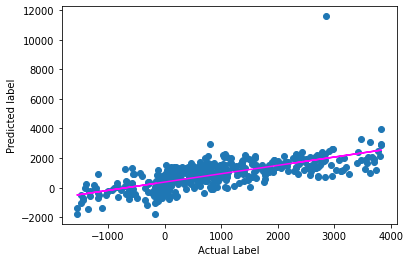

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel('Actual Label')
plt.ylabel('Predicted label')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

# Calculating evaluation metrics

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print(" MSE:", mse)

r2 = r2_score(y_test, predictions)
print("  R2:", r2)

 MSE: 836299.3546698106
  R2: 0.4324018042874258


# Experimenting with five more models

In [19]:
from sklearn.linear_model import Ridge,LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
regressor_models= {
    'LassoLarsCV':LassoLarsCV(cv=10),
    'Ridge':Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10),
    'RandomForest':RandomForestRegressor(),
    'GradientBoost':GradientBoostingRegressor(),
}

# Model performance on Train data

In [21]:
eval_results = pd.DataFrame(columns=['Model_name', 'MSE', 'R2'])

def evaluate_model():
    for model_name, model in regressor_models.items():
        model.fit(X_train_scaled,y_train)
        predictions = model.predict(X_train_scaled)
        mse = mean_squared_error(y_train, predictions)
        r2 = r2_score(y_train, predictions)
        eval_results.loc[len(eval_results.index)] = [model_name, round(mse, 2), round(r2, 2)]
    print(eval_results)

In [22]:
evaluate_model()

      Model_name        MSE    R2
0    LassoLarsCV  703022.33  0.53
1          Ridge  694012.50  0.54
2  Decision Tree   66287.53  0.96
3   RandomForest   75839.44  0.95
4  GradientBoost  104191.28  0.93


# Model performance on Test data

In [23]:
eval_results = pd.DataFrame(columns=['Model_name', 'MSE', 'R2'])

def evaluate_test_model():
    for model_name, model in regressor_models.items():
        
        model.fit(X_train_scaled,y_train)
        predictions = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        eval_results.loc[len(eval_results.index)] = [model_name, round(mse, 2), round(r2, 2)]
    print(eval_results)

In [24]:
evaluate_test_model()

      Model_name         MSE    R2
0    LassoLarsCV   784932.69  0.47
1          Ridge   835878.56  0.43
2  Decision Tree  1162477.32  0.21
3   RandomForest   572380.92  0.61
4  GradientBoost   291285.11  0.80


### **Observations**
- The Decision Tree model had the lowest MSE in the training set but the highest MSE in the test. This means the model overfit in the training test.
- Generally, the model performance decreased significantly for all the model but Gradient Boost Regressor performed better on the test data

### The model with the best performance based on the Mean squared error is Gradient Boost Regressor.

### Visualizing the prediction of GradientBoostRegressor model

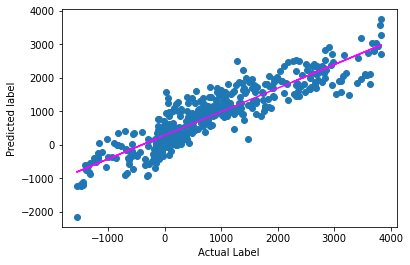

In [25]:
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled,y_train)
predict_gb = gb.predict(X_test_scaled)
import matplotlib.pyplot as plt
plt.scatter(y_test, predict_gb)
plt.xlabel('Actual Label')
plt.ylabel('Predicted label')

# Overlay the regression line
z = np.polyfit(y_test, predict_gb, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

# PART B

In [26]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
#test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

In [27]:
gb = GradientBoostingRegressor()

In [28]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [29]:
predicted = gb.predict(test_data)

In [30]:
test_df.iloc[:,-1] = predicted

In [31]:
test_df.iloc[:,-1] = round(test_df.iloc[:,-1],2)

In [32]:
# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

In [33]:
data = pd.read_csv('CE802_P3_Test_Predictions.csv')

In [34]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-72.18,995.49,0.60,-21.64,-13656.54,1,4748.60,40.72,0,686.04,...,364.17,16829.40,119.46,2,-244.62,17.19,-1171.32,4,252.58,388.39
1,-229.68,2337.36,2.02,-17.90,12620.40,3,3211.32,-140.38,4,447.63,...,279.09,7122.78,274.47,3,-440.55,16.79,-2247.80,2,132.25,1166.73
2,-402.24,2830.77,0.04,-35.14,-102.93,2,3602.00,387.18,1,379.98,...,122.79,21703.32,258.99,5,-269.04,13.77,-1335.86,5,138.75,-750.49
3,-369.66,1331.07,7.36,-15.38,-1616.13,2,3375.24,126.93,1,467.16,...,216.78,33672.72,253.86,4,-312.69,11.74,-2744.98,4,182.63,1428.18
4,-321.57,1511.70,3518.00,-29.04,4321.44,3,5541.96,34.98,4,510.45,...,348.81,15039.12,119.85,5,-415.77,16.55,-408.02,5,165.61,142.93
